### Финальный проект Яндекс практикум «Аналитик данных»
#### Исследование банка «Метанпром». Сегментация клиентов банка

##### Презентация и дашборд по итогу исследования сегментов клиентов банка «Метанпром»

<p><a href="https://drive.google.com/file/d/15Ie2B4a8xJx0cV4NSC0DZ7ekEcGMXjkT/view?usp=sharing">Ссылка на презентацию </a></p>

<p><a href="https://public.tableau.com/views/Final_Yand_proj/Summary?:language=en-US&:display_count=n&:origin=viz_share_link">Ссылка на дашборд </a></p>

#### Описание данных и проекта

##### Описание исследования

**Заказчик исследования:**

Отдел маркетинга

**Задача:**

Анализ данных регионального банка, банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Сегментация пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

**Какая и кому нужна информация:**

Информация необходима менеджеру, который занимается маркетинговыми компаниями и работает в тесной связке с менеджерами продуктов

**Что должно получиться на выходе:**

Сегменты пользователей по продуктам, которые подходят либо сегменты по количеству используемых продуктов и признакам отточности и не отточности.

**Причины возникновения исследования в банке:**

Последнее время драматически повысился отток, это начинает становится проблемой, которая угрожает существованию банка. Хотят проработать продуктовую линейку банка, как что бы удержать отточных так и привлечь новых, лояльных банку клиентов.

**Предыдущее исследование:**

Ранее проводилось исследование категорий клиентов. На его основе был составлен дашборд, но он устарел и по нему сейчас не ясно в чем заключается проблема и как её можно решать. Состав клиентов банка изменился и старые сегменты больше не подходят.


##### Описание данных

Датасет содержит данные о клиентах банка «Метанпром». 

* **`userid`** - идентификатор пользователя
* **`score`** - баллы кредитного рейтинга. баллы от `0` до `1000`, где `1000` самый высокий рейтинг
* **`city`** - город 
* **`gender`** - пол клиента, муж - мужской и жен - женский
* **`age`** - возраст клиента
* **`equity`** - приблизительная оценка собственности клиента, оценочная шкала `0` - `9`, где субъективная оценка `9` считается наивысшей
* **`balance`** - баланс на счете 
* **`products`** - количество продуктов, которыми пользуется клиент. от `0` до `5`
* **`credit_card`** - есть ли кредитная карта у клиента, `1` есть, `0` нет
* **`last_activity`** - был ли клиент активен в последнее время. `1` была активность, `0` не был активен в последнее время
* **`est_salary`** - оценочная заработная плата клиента, среднемесячная
* **`churn`** - уходит или нет, `1` - имеет четкое желание уйти, `0` нет

#### Загрузка данных и подготовка к исследованию

##### Загрузка данных

**Импорт необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
from datetime import datetime,timedelta
from matplotlib import pyplot as plt
from plotly import graph_objects as go

In [2]:
#Параметры для графиков
sns.set(style='whitegrid', rc={'figure.figsize': (15, 5)})

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [4]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


##### Проверка актуальности названий столбцов и актуальности типов данных

In [5]:
df.rename(columns={'USERID':'user_id','EST_SALARY':'est_salary'}, inplace=True)
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Первичные выводы по данным**

В датафрейме типы столбцов соответсвуют данным в столбцах. Наименования столбцов преведенны к snake_case. В столбцах **`age`** и **`balance`** присутствуют `Nan` значения, их проверю позже.

##### Проверка пропусков в данных

In [7]:
list_col = ['balance','age']
df_col = df.shape[0]

for column in list_col:
    nan_val = df[df[column].isna()].shape[0]
    print(f'В столбце {column} {nan_val} пропусков, доля пропусков от основного датафрейма {nan_val/df_col:.2%}')

В столбце balance 2295 пропусков, доля пропусков от основного датафрейма 22.95%
В столбце age 26 пропусков, доля пропусков от основного датафрейма 0.26%


###### Пропуски в столбце balance

In [8]:
nan_balance = df[df['balance'].isna()]
not_nan_balance = df.dropna(subset=['balance']).reset_index(drop=True)

**Рассмотрим основные параметры для дискретных столбцов**

In [9]:
nan_balance[['score','age','est_salary']].describe()

,score,age,est_salary
count,2295.000000,2279.000000,2.295000e+03
mean,865.352070,42.093023,2.263102e+05
std,89.603091,11.941551,1.997718e+05
min,642.000000,18.000000,2.027403e+04
25%,871.000000,33.000000,1.203477e+05
50%,903.000000,40.000000,1.741607e+05
75%,922.000000,49.000000,2.400150e+05
max,990.000000,86.000000,1.333687e+06


In [10]:
not_nan_balance[['score','age','est_salary']].describe()

,score,age,est_salary
count,7705.000000,7695.000000,7.705000e+03
mean,843.739260,42.924366,1.245019e+05
std,55.332162,12.244010,1.046635e+05
min,689.000000,18.000000,2.546300e+03
25%,801.000000,33.000000,6.755181e+04
50%,840.000000,40.000000,1.062222e+05
75%,882.000000,52.000000,1.550457e+05
max,1000.000000,86.000000,1.395064e+06


**Вывод**

**По кредитному рейтингу (score):**

- Средний кредитный рейтинг выше у клиентов с пропущенными балансами (865.36 против 843.74).
- Медиана близка в обеих группах.

**По возрасту (age):**

- В обеих группах средний возраст примерно одинаковый (42 года для пропущенных балансов и 42.92 года для без пропусков).
- Медиана также близка в обеих группах.

**По заработной плате (est_salary):**

- В среднем клиенты с пропущенными балансами имеют более высокую заработную плату (226,345 против 124,520).
- Медианное значение также выше у клиентов с пропущенными балансами.

**Распределение долей по категориальным столбцам**

In [11]:
def plot_histograms(df1, df2, column_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

    ax1 = axes[0]
#     sns.histplot(data=df1, y=column_name, stat='percent', ax=ax1)
    #CODE REVIEW
    sns.histplot(data=df1, y=column_name, stat='density', ax=ax1)
    ax1.set_title(f'{column_name} с пропусками в балансе')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Доля, %')
    ax1.set_yticks(df1[column_name].unique())

    ax2 = axes[1]
    sns.histplot(data=df2, y=column_name, stat='density', ax=ax2)
    ax2.set_title(f'{column_name} без пропусков в балансе')
    ax2.set_xlabel(column_name)
    ax2.set_ylabel('Доля, %')
    ax2.set_yticks(df2[column_name].unique())

    plt.tight_layout()
    plt.show()

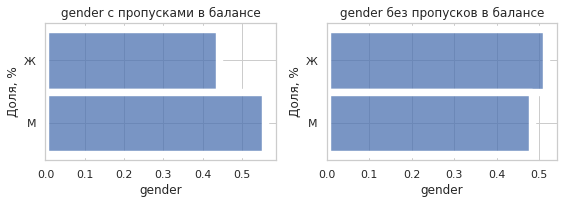

In [12]:
plot_histograms(nan_balance,not_nan_balance,'gender')

Распределение по полу, у клиентов с пропусками преобладают мужчины около 57%, без пропусков женщины более 51%

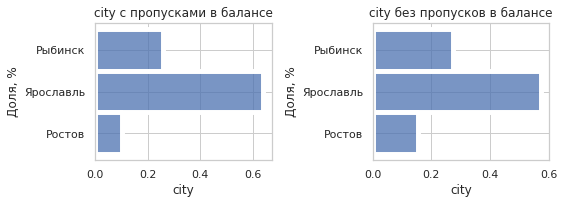

In [13]:
plot_histograms(nan_balance,not_nan_balance,'city')

Распределение по городам примерно похоже, большинство клиентов из Ярославля, далее Рыбинск и завершает Рыбинск

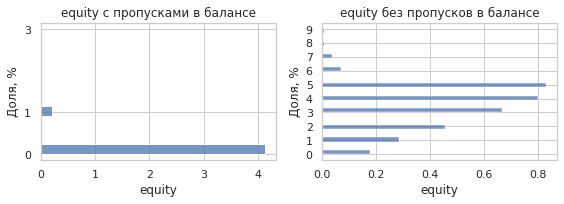

In [14]:
plot_histograms(nan_balance,not_nan_balance,'equity')

Для клиентов с пропусками в балансе преобладает количество объектов недвижности равных 0, около 5 процентов клиентов имеют 1 объектов недвижимости.

Без пропусков присутствует полный спектр количества объектов, наиболее значимы клиенты владеющие от 1 до 5 объектов недвижимости.

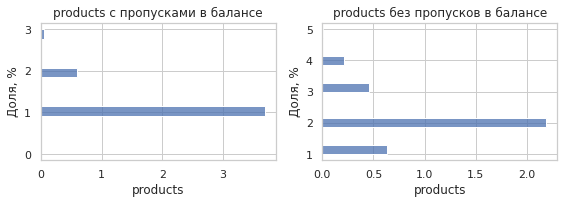

In [15]:
plot_histograms(nan_balance,not_nan_balance,'products')

По количеству продуктов, в датафрейме с пропусками наибольшее количество отдано клиентам с 1 продуктом. Так же присутствует странное значение в 0 продуктов. Проанализирую его далее.

Без пропусков наибольшее количество клиентов с 2 продуктами далее идут с 1.

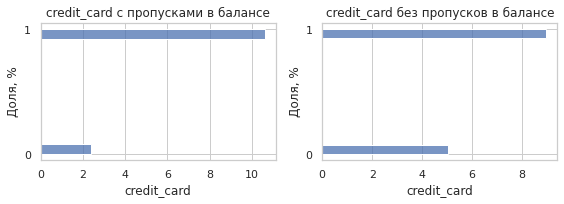

In [16]:
plot_histograms(nan_balance,not_nan_balance,'credit_card')

В обоих датафреймах преобладают клиенты с кредитной картой, однако доли немного разнятся

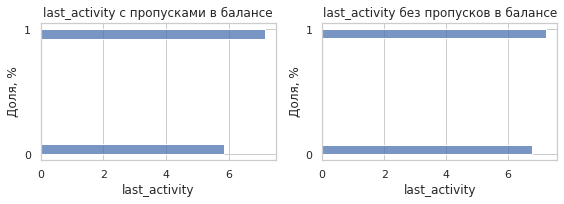

In [17]:
plot_histograms(nan_balance,not_nan_balance,'last_activity')

Так же как по кредитным картам равнозначно преобладают клиенты с последней активностью, однако доли разные.

**Общий вывод по пропускам в столбце**

- Клиенты с пропущенными балансами обычно имеют выше средний кредитный рейтинг (865.36 против 843.74) и заработную плату (226,345 против 124,520), но схожий возраст.
- В распределении по полу и городам наблюдаются различия.
- У клиентов с пропусками преобладают мужчины (57%), без пропусков женщины более 51%.
- Распределение по городам примерно одинаково.
- Владение недвижимостью с пропусками в балансе чаще ограничивается 0 объектами (около 5%).
- В датафрейме с пропусками наибольшее количество клиентов с 1 продуктом, наблюдается также странное значение в 0 продуктов.
- Без пропусков наибольшее количество клиентов с 2 продуктами.
- Преобладание клиентов с кредитной картой и последней активностью заметно в обоих датафреймах, но доли различаются.

Так же пропуски могли бы возникнуть при ошибочном вводе баланса. Проверю выгрузив строки с нулевыми значениями.

In [18]:
df[df['balance'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


В датафрейме всего **2** строки с **0** балансом. Можно сделать вывод что действительно клиенты с нулевым балансом могут иметь `Nan` значения в балансе. Удаляя эти пропуски будет потеряно большое количество данных. Заменить их на **0** значения будет некорректно, тк точного подтверждения что эти значения равны 0 балансу нет.

###### Пропуски в столбце age

In [19]:
df[df['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


В столбце `age` 26 пропусков, это менее одного процента. Какий то явных зависимостей между столбцами нет. Столбец с возрастом может стать ключевым при формировании сегментов клиентов. Так же все кроме одного клиента банка с пропусками возраста являются не оточными.

По итогу удаление строк не скажется пагубно на исследовании, принимаю решение удалить строки с пропусками в столбце `age`.

In [20]:
df = df.dropna(subset=['age']).reset_index(drop=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 935.2+ KB


**Вывод по выявленным пропускам**

По итогу обработки пропусков из датафрейма удалено менее `0,3%` строк. Остались не отработанным пропуски в столбце `balance`, тк точной информации о возможности подставления **"заглушки"** нет.

##### Проверка явных и не явных дубликатов

In [22]:
df[df.duplicated()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


In [23]:
pd.set_option('display.max_rows', None)
dupl_shape = df[df['user_id'].duplicated(keep=False)].shape[0]
print(f'Доля дубликатов в датафрейме в столбце user_id {dupl_shape/df_col:.2%}')
print()
display(df[df['user_id'].duplicated(keep=False)].sort_values(by='user_id'))
pd.reset_option('display.max_rows')

Доля дубликатов в датафрейме в столбце user_id 1.00%



,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1892,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7683,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
4862,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7531,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5856,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
5889,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
1410,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8621,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
9750,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
8151,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1


Полных дубликатов в строках не обноруженно. В столбце с уникальными значениями `user_id` обнаруженны дубликаты, тк уточнить какие строки верные нет возможности оставляю данные без изменений.

In [24]:
list_dubl = ['age','city','gender','equity','products','credit_card','last_activity','churn']
for column in list_dubl:
    print('Уникальные значения в столбце {}: {}'.format(column,df[column].sort_values().unique()))
    print()

Уникальные значения в столбце age: [18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 86.]

Уникальные значения в столбце city: ['Ростов' 'Рыбинск' 'Ярославль']

Уникальные значения в столбце gender: ['Ж' 'М']

Уникальные значения в столбце equity: [0 1 2 3 4 5 6 7 8 9]

Уникальные значения в столбце products: [0 1 2 3 4 5]

Уникальные значения в столбце credit_card: [0 1]

Уникальные значения в столбце last_activity: [0 1]

Уникальные значения в столбце churn: [0 1]



**Выводы по дубликатам**

При проверке явных дубликатов было обнаружено 100 задвоенных строк с `user_id`. Строки с дубликатами занимали 1% данных. Принял решение удалить строки с дубликаттами. При проверке неявные дубликаты не выявлены в столбцах: `age`, `city`, `gender`, `equity`, `products`, `credit_card`, `last_activity`, `churn`.

##### Формирование необходимых столбцов

In [25]:
column_name = {
    'rostov'   :'Ростов',
    'ribinsk'  :'Рыбинск',
    'yaroslavl':'Ярославль'
}

for i in column_name.keys():
    df[i] = df['city'].apply(lambda x: 1 if x == column_name.get(i) else 0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  rostov         9974 non-null   int64  
 13  ribinsk        9974 non-null   int64  
 14  yaroslavl      9974 non-null   int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 1.1+ MB


##### Вывод по блоку подготовки данных

По итогу предобработки данных:

- Имена столбцов приведены к snake_case и проверена актуальность типов данных в стобцах
- Из датафрейма удалены строки с `Nan` в столбце `age`, тк возраст один из ключевых значений. Строки с пропусками в столбце `balance` оставлены в датафрейме, тк они занимают значительную часть датафрейма. Их можно было бы заменить на 0, но для этого нужно уточнить у заказчика
- Удаленые явные дубликаты в столбце уникальных значений `user_id`. Проверены столбцы на неявные дубликаты
- Добавленый необходимые категориальные столбцы. Описание новых столбцов:
    *  **`rostov`** - 1,0 где 1 указываеот что пользователь из Ростова
    *  **`ribinsk`** - 1,0 где 1 указываеот что пользователь из Рыбинска
    *  **`yaroslavl`** - 1,0 где 1 указываеот что пользователь из Ярославля

#### Исследовательский анализ данных

##### Расчет средней доли оттока активных и не активных клиентов

In [27]:
print(f'Средняя доля оттока клиентов {df["churn"].mean():.2%}')

Средняя доля оттока клиентов 18.24%


**Вывод по блоку**

Средняя доля оттока по всем пклиентам из данных определена. Порог 5 процентных пунктов отклонения от среднего оттока по банку, обговоренный ранее с заказчиком принимаю для дальнейшего исследования.

##### Проверка корреляций по оттоку покупателей

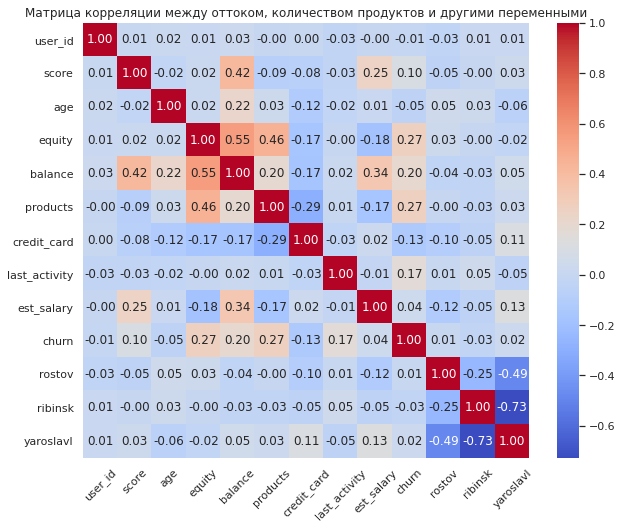

In [28]:
correlation_matrix = df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.title('Матрица корреляции между оттоком, количеством продуктов и другими переменными')
plt.show()

**Вывод по блоку**

При анализе видно ярко выраженная отрицательная корреляция между критериями `credit_card` и оттоком. Отрицательная корреляция говорит что клиенты у которых есть кредитная карта более лояльны к банку, из-за дополнительных льгот. Так же это может говорить о сильной зависимости с заработной платой, однако зависимость минимальна.

Положительная кореляция ярковыраженна и имеется прямая зависимость между столбцами/признаками `score` - кредитный рейтинг, `equity` - оценка собствености клиентов, `balance` - баланс на счету, `products` - количество продуктов, `last_activity` - последняя активность. По этим признакам есть линейная прямая зависимость.

##### Распределение дискретных данных по разрезам и формирование категорий

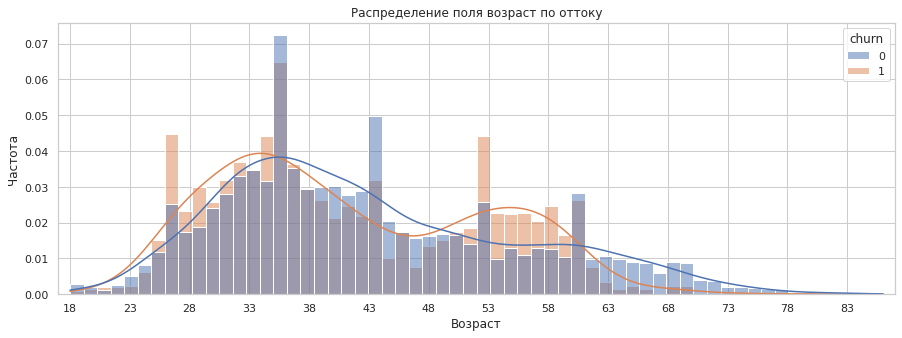

In [29]:
sns.histplot(data=df, x='age', hue='churn', bins=60, kde=True,common_norm=False, stat='density')
plt.title(f'Распределение поля возраст по оттоку')
plt.xticks(range(18,87,5))
plt.xlim(left=17,right=87)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

In [30]:
bins  = [18,30,38,51,61,87]
labels = ['18-29','30-37','38-50','51-60','61-86']
df['age_category'] = pd.cut(df['age'],bins=bins,labels=labels,right=False)
print('Распределение по группам:')
df['age_category'].value_counts().sort_index()

Распределение по группам:


18-29    1148
30-37    2959
38-50    3256
51-60    1578
61-86    1033
Name: age_category, dtype: int64

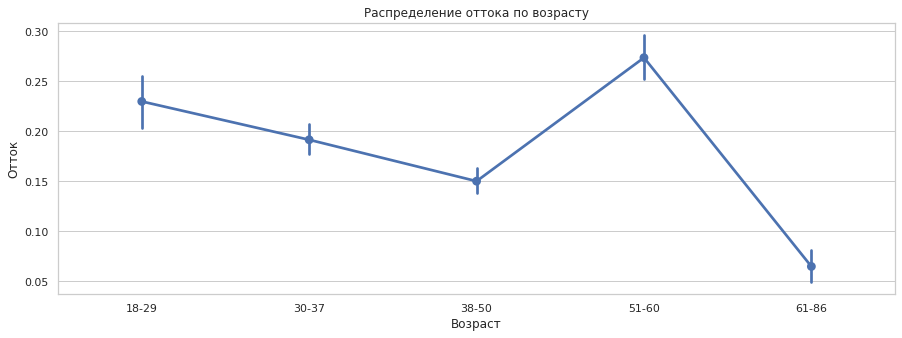

In [31]:
sns.pointplot(data=df, x='age_category', y='churn')
plt.title(f'Распределение оттока по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Отток')
plt.show()

**Вывод**

Сегменты в категориальном столбце распределены правктически равномерно, в сегментах **18-29** и **51-60** наблюдается самый высокий отток.

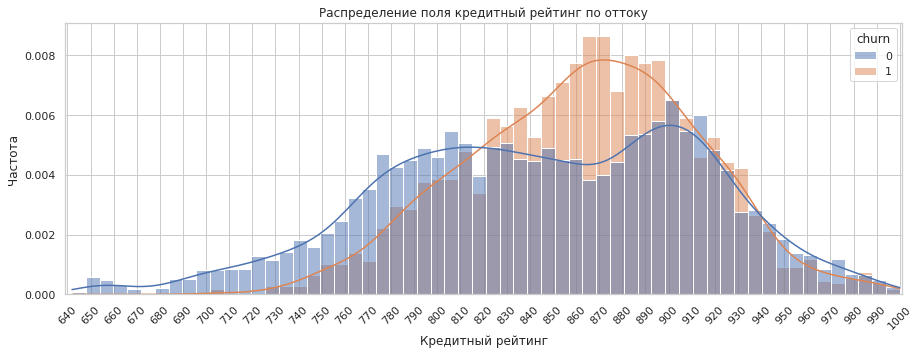

In [32]:
sns.histplot(data=df, x='score', hue='churn', bins=60, kde=True,common_norm=False, stat='density')
plt.title(f'Распределение поля кредитный рейтинг по оттоку')
plt.xticks(range(640,1001,10),rotation=45)
plt.xlim(left=639,right=1001)
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Частота')
plt.show()

In [33]:
bins = [641,821,901,921,941,1001]
labels = ['641-820','821-900','901-920','921-940','941-1000']
df['score_category'] = pd.cut(df['score'],bins=bins,labels=labels,right=False)
print('Распределение по группам:')
df['score_category'].value_counts().sort_index()

Распределение по группам:


641-820     3397
821-900     4157
901-920     1106
921-940      692
941-1000     622
Name: score_category, dtype: int64

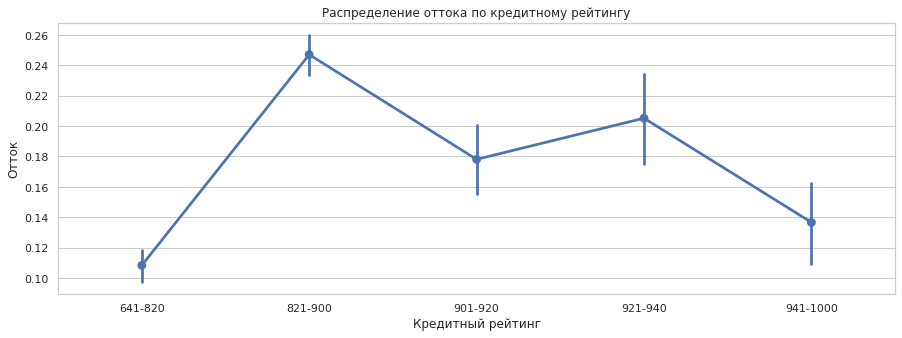

In [34]:
sns.pointplot(data=df, x='score_category', y='churn')
plt.title(f'Распределение оттока по кредитному рейтингу')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Отток')
plt.show()

**Вывод**

По кредитному рейтингу основная часть клиентов отосится к рейтингу 821-900, эта часть и является самой отточной. Второй категорией с высоким оттоком является группа 921-940.

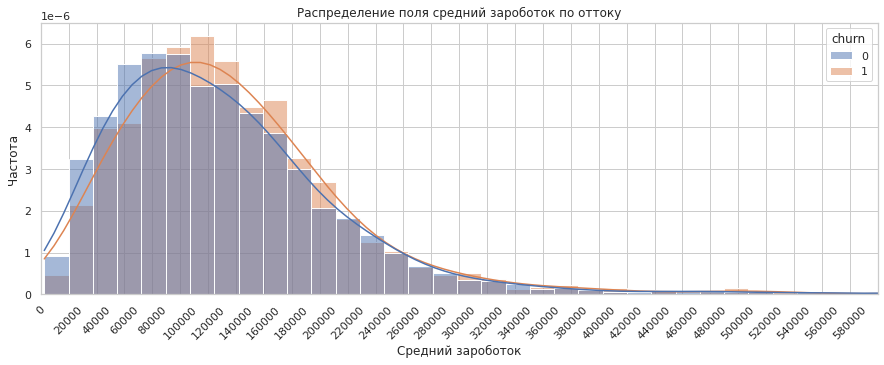

In [35]:
sns.histplot(data=df, x='est_salary', hue='churn', bins=80, kde=True,common_norm=False, stat='density')
plt.title(f'Распределение поля средний зароботок по оттоку')
plt.xlabel('Cредний зароботок')
plt.xlim(right=600000, left=0)
plt.xticks(range(0,600000,20000),rotation=45)
plt.ylabel('Частота')
plt.show()

In [36]:
bins = [0,60000,100000,140000,200000,1395065]
labels = ['0-60k','60k-100k','100k-140k','140k-200k','200k-1.4kk']
df['salary_category'] = pd.cut(df['est_salary'],bins=bins,labels=labels,right=False)
print('Распределение по группам:')
df['salary_category'].value_counts().sort_index()

Распределение по группам:


0-60k         1694
60k-100k      2231
100k-140k     2100
140k-200k     2203
200k-1.4kk    1746
Name: salary_category, dtype: int64

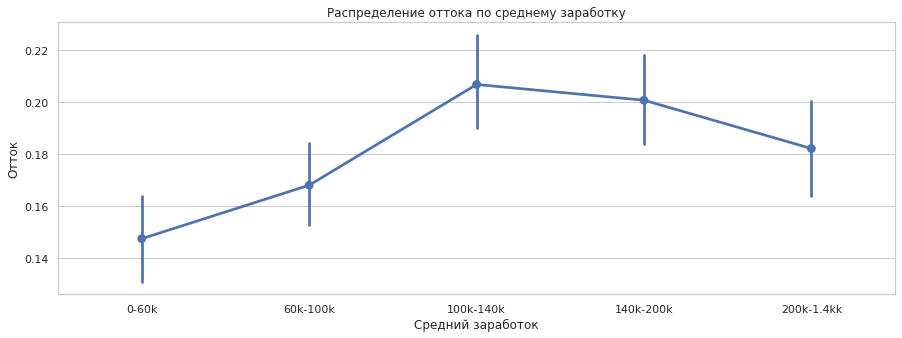

In [37]:
sns.pointplot(data=df, x='salary_category', y='churn')
plt.title(f'Распределение оттока по среднему заработку')
plt.xlabel('Средний заработок')
plt.ylabel('Отток')
plt.show()

**Вывод**

Отток по категориям распределен примерно так же как в категории с рейтингом. Чем выше средняя зарплата тем выше доля оттока, в финальной категории отток снижается.

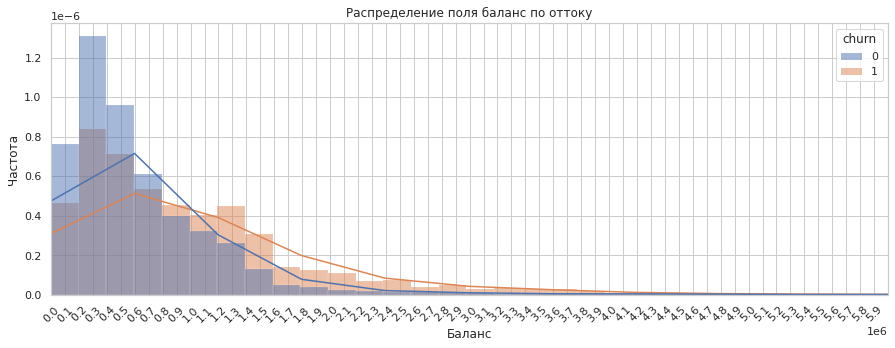

In [38]:
sns.histplot(data=df, x='balance', hue='churn', bins=600, kde=True,common_norm=False, stat='density')
plt.title(f'Распределение поля баланс по оттоку')
plt.xlabel('Баланс')
plt.xlim(right=6000000,left=0)
plt.xticks(range(0,6000000,100000),rotation=45)
plt.ylabel('Частота')
plt.show()

In [39]:
bins = [0,300000,500000,800000,1200000,119113553]
labels = ['0-300k','300k-500k','500k-800k','800k-1.2kk','1.2kk-119kk']
df['balance_category'] = pd.cut(df['balance'],bins=bins,labels=labels,right=False)
print('Распределение по группам:')
df['balance_category'].value_counts().sort_index()

Распределение по группам:


0-300k         1959
300k-500k      1736
500k-800k      1493
800k-1.2kk     1171
1.2kk-119kk    1336
Name: balance_category, dtype: int64

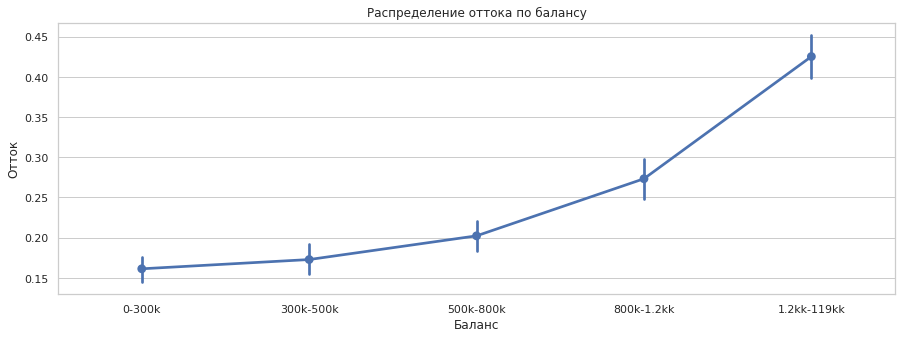

In [40]:
sns.pointplot(data=df, x='balance_category', y='churn')
plt.title(f'Распределение оттока по балансу')
plt.xlabel('Баланс')
plt.ylabel('Отток')
plt.show()

**Вывод**

В ситуации с категориями по балансу прослеживается явная зависимость, чем выше доход тем больше доля оттока.

**Вывод по блоку**

Были сформированы первичные категории:
*  **`age_category`** - пять категорий распределения по возрасту, самая высокая отточность в сегментах **18-29** и **51-60**.
*  **`score_category`** - пять категорий по кредитному рейтингу, чем выше рейтинг тем больше доля оттока. Сегмент с самым высоким **821-900**, **921-940**. Пиковое значение оттока в категории **821-900**, эта жке группа является самой многочисленной.
*  **`salary_category`** - по среднему заработку так же сформированно 5 категорий. Самый высокий отток в категориях **100k-140k**,**140k-200k**.
*  **`balance_category`** - Чем выше баланс, тем больше отток. Начиная с категории **500k-800k** отток растет вплоть до последней категории

**Дополнительно сравню распределение пользователей по остальным категориальным столбцам**

In [41]:
cat_list = {
    'Пол':'gender',
    'Оценка собственности':'equity',
    'К-во продуктов':'products',
    'Наличие кредитной карты':'credit_card',
    'Последняя активность':'last_activity'
}
for title,col in cat_list.items():
    print(f'Распределение по группам по полю {title}:')
    display(df[col].value_counts().sort_index())

Распределение по группам по полю Пол:


Ж    4983
М    4991
Name: gender, dtype: int64

Распределение по группам по полю Оценка собственности:


0    2576
1     773
2    1051
3    1541
4    1847
5    1915
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

Распределение по группам по полю К-во продуктов:


0       1
1    3323
2    5119
3    1038
4     474
5      19
Name: products, dtype: int64

Распределение по группам по полю Наличие кредитной карты:


0    3190
1    6784
Name: credit_card, dtype: int64

Распределение по группам по полю Последняя активность:


0    4759
1    5215
Name: last_activity, dtype: int64

In [42]:
df[df['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,ribinsk,yaroslavl,age_category,score_category,salary_category,balance_category
8939,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,0,1,0,61-86,941-1000,0-60k,NaN


**Вывод**

К категории без продуктов относится один клиент,с высоким рейтингом, максимальной возарстной категорией, низким средним ежемесячным доходом, с пустым балансом и с признаком оттока = 1. Можно сделать вывод что клиент решил окончательно разорвать отношения с банком.

##### Сравнение доли оттока по категориям клиентов(по возрасту, полу, месту жительства, количеству продуктов и среднему доходу, наличию кредитной карты)

In [43]:
list_group = {
    'Пол':'gender',
    'Средний доход':'salary_category',
    'Баланс':'balance_category',
    'Возраст':'age_category',
    'Кредитный ретинг':'score_category',
    'Оценка собственности клиента':'equity',
    'Количество продуктов':'products',
    'Наличие кредитной карты':'credit_card',
    'Была ли последняя активность':'last_activity',
    'Города':'city'
}

In [44]:
copy_df = df[df['products']!=0]

for title, group in list_group.items():
    churn_by = copy_df.groupby(group)['churn'].mean().reset_index().rename(columns={'churn': 'отток'})
    print(f'Доля оттока по полю {title}:')
    for index, row in churn_by.iterrows():
        category = row[group]
        churn_rate = row['отток']
        sum_churn_rate = df["churn"].mean()
        
        is_nan = pd.isna(churn_rate)
        if is_nan:
            print(f'{category}: Нет пользователей')
        else:
            change_positive = churn_rate > (sum_churn_rate + 0.05)
            change_negative = churn_rate < (sum_churn_rate - 0.05)

            if change_positive:
                print(f'{category}: Отток {churn_rate:.2%}, превышает общий отток на более чем 5пп')
            elif change_negative:
                print(f'{category}: Отток {churn_rate:.2%}, меньше общего оттока на более чем 5пп')
            else:
                print(f'{category}: Отток {churn_rate:.2%}, не отклоняется от общего оттока на более чем 5пп')
    
    print()

Доля оттока по полю Пол:
Ж: Отток 12.75%, меньше общего оттока на более чем 5пп
М: Отток 23.70%, превышает общий отток на более чем 5пп

Доля оттока по полю Средний доход:
0-60k: Отток 14.71%, не отклоняется от общего оттока на более чем 5пп
60k-100k: Отток 16.81%, не отклоняется от общего оттока на более чем 5пп
100k-140k: Отток 20.67%, не отклоняется от общего оттока на более чем 5пп
140k-200k: Отток 20.06%, не отклоняется от общего оттока на более чем 5пп
200k-1.4kk: Отток 18.21%, не отклоняется от общего оттока на более чем 5пп

Доля оттока по полю Баланс:
0-300k: Отток 16.13%, не отклоняется от общего оттока на более чем 5пп
300k-500k: Отток 17.28%, не отклоняется от общего оттока на более чем 5пп
500k-800k: Отток 20.23%, не отклоняется от общего оттока на более чем 5пп
800k-1.2kk: Отток 27.33%, превышает общий отток на более чем 5пп
1.2kk-119kk: Отток 42.51%, превышает общий отток на более чем 5пп

Доля оттока по полю Возраст:
18-29: Отток 23.00%, не отклоняется от общего оттока 

**Для большей наглядности отражу на графиках**

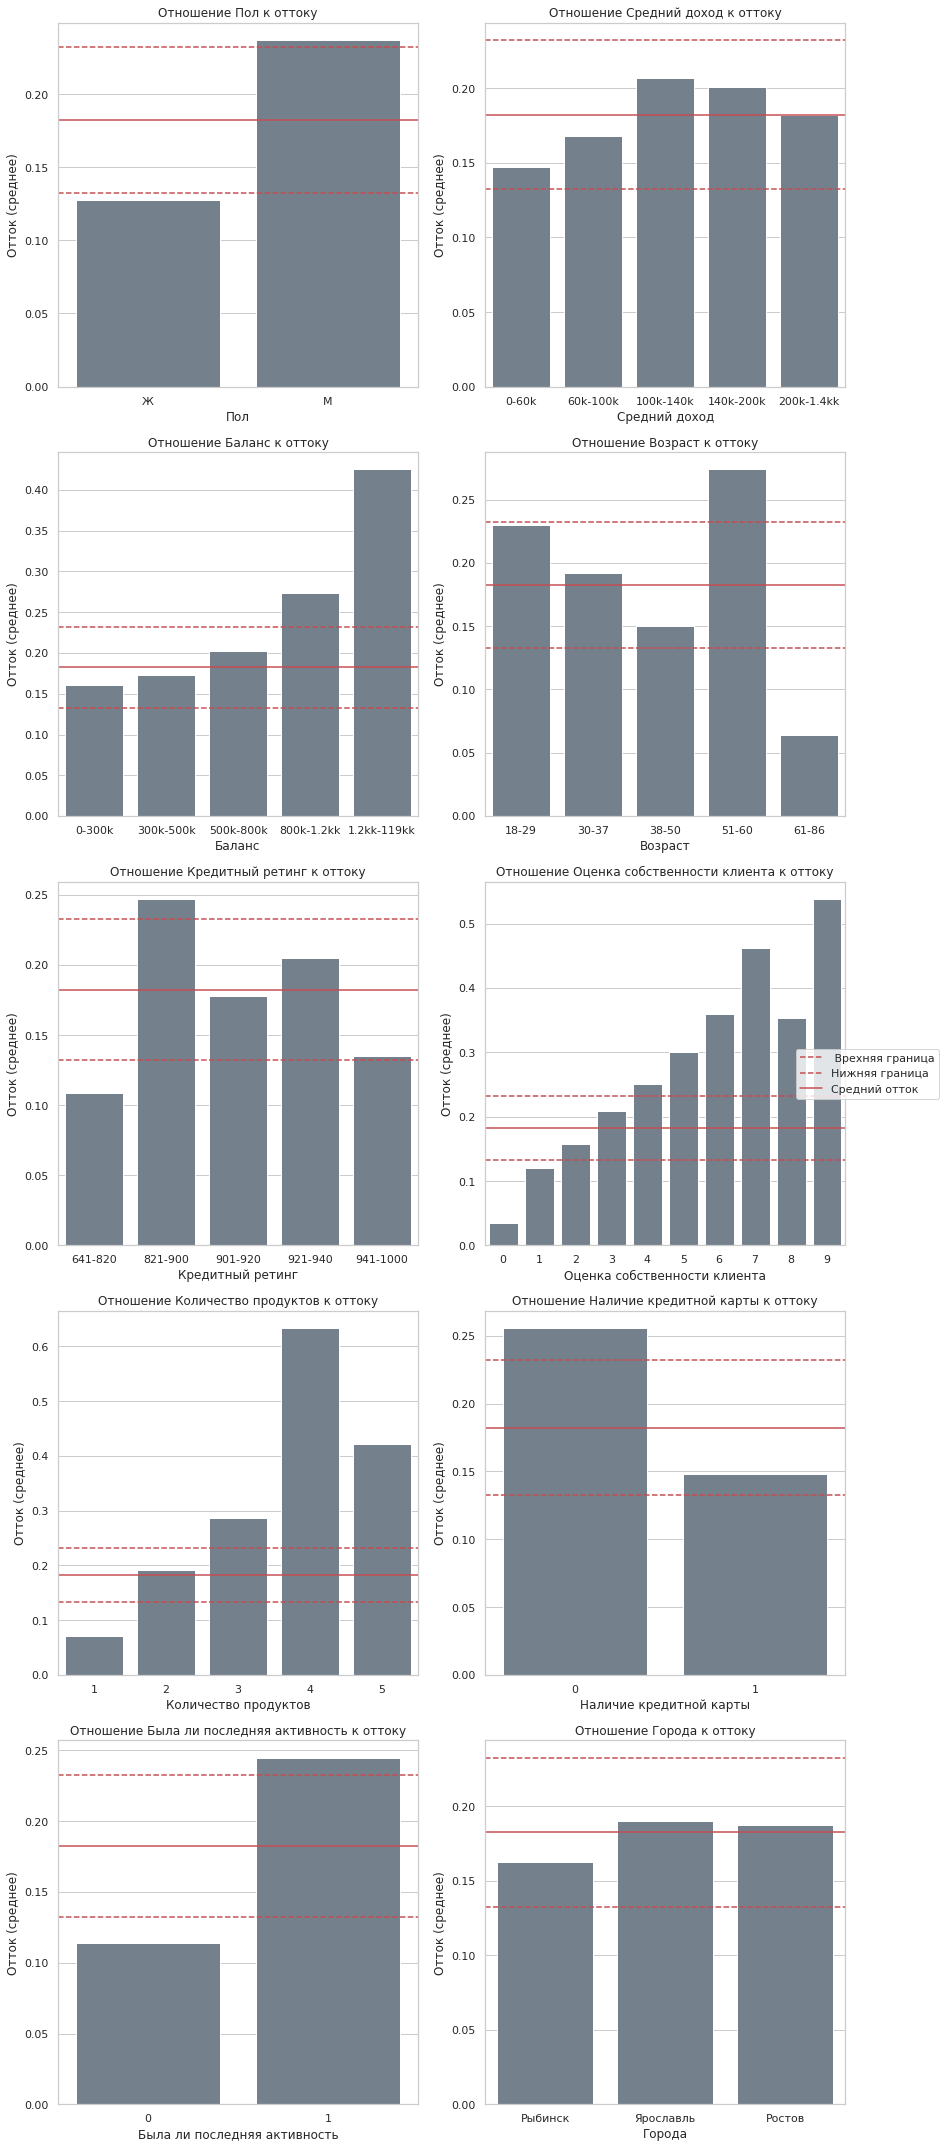

In [45]:
fig, axes = plt.subplots(5, 2, figsize=(12, 30))
for i, (title, col) in enumerate(list_group.items()):
    ax = plt.subplot(5, 2, i + 1)
    sns.barplot(data=copy_df, x=col, y='churn', ci=None,color='slategrey')
    
    plt.axhline(y=df['churn'].mean()+0.05, color='r', linestyle='--', label='Врехняя граница оттока')
    plt.axhline(y=df['churn'].mean()-0.05, color='r', linestyle='--', label='Нижняя граница оттока')
    plt.axhline(y=df['churn'].mean(), color='r', linestyle='-', label='Средний отток')
    
    plt.title(f'Отношение {title} к оттоку')
    plt.xlabel(title)
    plt.ylabel('Отток (среднее)')
    
plt.tight_layout()
fig.legend([' Врехняя граница', 'Нижняя граница', 'Средний отток'], loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()

**Вывод по блоку**

Проанализировав долю отточных клиентов по категориям можно сказать:
- **`Пол` `-`** Наблюдается существенное отклоенение от среднего оттока по каждой из категорий мужчины(23.80%), женщины(12.84%). Доля оттока внутри категории разница на 10 процентных пунктов. Можно сделать выводы что среди отточных клиентов большинство мужчин. Пол может считаться важным фактором при оценке оттока клиентов.

- **`Средний доход` `-`** Уровень дохода не оказывает существенного влияния на отток клиентов. Отток остается стабильным в разных категориях дохода и не привышает порога отклоения. 

- **`Баланс` `-`** Клиенты с более высоким балансом (Q4 более 980754) имеют более высокое отклонение от общего оттока(38.47%). Можно построить первичный вывод что клиенты с высоким балансом пользуются малым количеством продуктов банка.

- **`Возраст` `-`** Возрастные группы не отклоняются от общего оттока на более чем 5%. Самое высокое значение оттока у молодых клиентов (21.41%). Самый низкий отток, клиенты отток которых оттклоняется более чем на 5 процентных пунктов, старше 60 лет (Пожилой 8.95%, Старый 3.12%).

- **`Кредитный ретинг` `-`** Клиенты с рейтином **medium** и **good**, не имеют значительного отклонения в оттоке от среднего оттока по всем данным. Клиенты с рейтингом **bad** имеют самое высокое отклонение, которое более чем на 5 процентных пунктов меньше среднего оттока. Это может говорить о малом количестве таких клиентов или малой активности в банке. Категория с рейтингм **very_good** имеет так же высокое отклоение, но оно не превышает порогового значения.

- **`Оценка собственности клиента` `-`** Более высокие оценки собственности связаны с более высоким оттоком. Это может быть связано с тем, что условия предотсавляемые банком не отвечают на запрос клиентов с высоким достатком и они уходят к конкурентам.

- **`Количество продуктов` `-`** Клиенты с 3 и более продуктами имеют высокий отток (привышающий отклонение на 10 процентных пунктов средний отток), что опять таки может указывать на продукты прелдоставляемые банком.

- **`Наличие кредитной карты` `-`** Клиенты без кредитных карт имеют более высокий отток (25.69%). Наличие кредитной карты может быть фактором, удерживающим клиентов. Тк отток таких клиентов ниже среднего.

- **`Города` `-`** Отток клиентов в городах Ростов, Рыбинск и Ярославль не отклоняются более чем на 5% от среднего оттока, следовательно территориальное расположение города не влияет на отток в рамках данного исследования.


В целом, при формировании портрета клиента стоит обращать внимание на такие факторы, как пол, баланс, возраст, кредитный ретинг, оценка собственности, количество продуктов и наличие кредитной карты. Однако стоит учитывать, что каждый из этих факторов может взаимодействовать с другими, и дополнительные исследования могут быть полезны для получения более глубокого понимания причин оттока клиентов.

##### Общий вывод по исследовательский анализу

По итогу исследовательского анализа стало ясно что основными категориальными признаками которые влияют на отток являются:

- `Категории баланса`, чем выше средний баланс на счету клиента тем больше доля оттока.
- `Категории возраста`, с категорией молодых людей 18-29 близкой к среднему оттоку по всем данным. Категория 51-60 с самым высоким оттоком и категория **61-86** с самым низким оттоком.
- `Категории кредитного рейтига`, клиенты с низким рейтингом с низким оттоком и клиенты с максимальным рейтингом у которых самый высокий отток.
- `Категории оценки собствености`, где после рейтинга 3 резко начнинает расти отток и с увеличением рейтинга он достигает доли более 50%
- `Признак наличия кредитной карты`, отсутствие кредитной карты влияет на рост оттока пользователей.
- `Признак была ли активность в недавнее время`, пользователи с недавней активностью имеют высокую долю оттока. Как раз таки недавняя активность и могла закулючаться в разрыве отношений с банком
- `Категория количество продуктов`, на ней чуть подробнее. Основную часть занимают клиенты с 1 продуктом(3306 клиентов) и 2 продуктами(5095 клиентов). Остальные категории занимают меньшую долю суммарно составляя около 1500 клиентов. Так же выделяется категория с 0 продуктов и 1 отточным клиентом в ней. Как раз таки отсутствие продуктов и могло повлиять на разрыв отношений с банком. По оттоку клиенты с 1 продуктом имеют низкую отточность, это может быть зарплатная карта которую выдали клиентам на предприятии. Клиенты с 2 продуктами имеют среднюю отточность находящуюся на одном уровне со средней по датафрейму. У клиентов с 3 и более продуктами отточность резко растет.

#### Проверка статистических гипотез

##### Различия в возрасте групп по количеству продуктов 

**`H0`** - `различий в возрасте между клиентами пользующимися двумя и одним продуктами нет`

**`H1`** - `различия в возрасте между клиентами пользующимися двумя и одним продуктами имеют статистическую значимость`

###### Проверка выборок, выбор типа статистического теста и уровня стат значимости

**Сравним размеры выборок используемых в проверке гипотез**

In [46]:
group_two_products = df[df['products'] == 2]['age']
group_one_product  = df[df['products'] == 1]['age']
group_products = df[(df['products'] == 1) | (df['products'] == 2)]['age']

print(f'Размер выборки с клиентами которые используют два продукта {group_two_products.shape[0]}')
print(f'Размер выборки с клиентами которые используют один продукт {group_one_product.shape[0]}')

Размер выборки с клиентами которые используют два продукта 5119
Размер выборки с клиентами которые используют один продукт 3323


**Проверим нормальность распределения выборок**

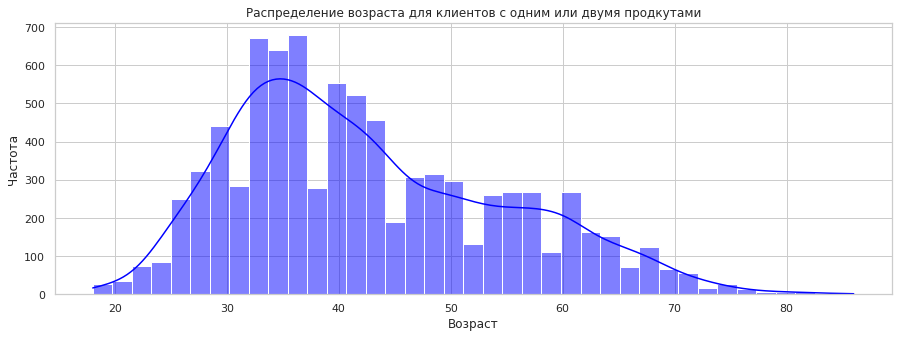

In [47]:
sns.histplot(group_products, color='blue', kde=True)
plt.title('Распределение возраста для клиентов с одним или двумя продкутами')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

**Дополнительно проверим распределение тестом Андерсона-Дарлинга**

Выбор теста обусловлен следующими причинами:
- **`Ненормальность распределения`**: Тест Колмогорова-Смирнова является непараметрическим тестом, который не требует заранее известных параметров распределения. Это важно, тк мы не не уверены может ли распределение отличаться от нормального.

- **`Универсальность:`** Тест Колмогорова-Смирнова является универсальным тестом, который может применяться для различных типов распределений, не ограничиваясь только нормальным распределением. В нашем случае за параметр распределения отвечает `norm`

- **`Простота интерпретации:`** Результат теста Колмогорова-Смирнова представлен p-value, который легко интерпретировать. Если p-value меньше уровня значимости, то есть основания отвергнуть нулевую гипотезу о том, что данные имеют определенное распределение.

In [48]:
statistic, p_value = kstest(group_products, 'norm')
alpha = 0.05

print(f'Для группы клиентов с одним или двумя продуктами')
print(f'Тест Колмогорова-Смирнова - p-value: {p_value}')
print(f'Уровень статистической значимости {alpha}')
print()

# Проверка отклонения от нормальности
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение клиентов не является нормальным.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: распределение клиентов является нормальным.')

Для группы клиентов с одним или двумя продуктами
Тест Колмогорова-Смирнова - p-value: 0.0
Уровень статистической значимости 0.05

Отвергаем нулевую гипотезу: распределение клиентов не является нормальным.


Исходя из результатов p-value стремится к нулю, можно с увереностью сказать что распределение не стремится к нормальному

* `Равенство дисперсий`: Дисперсии не равны, в одной выборке **5095**, в другом **3306**
* `Данные по возрасту непрерывны`: Исходя из отсутсвия пропусков на гистограмах можно сделать вывод что данные непрерывны.
* `Нормальность распределений`: Распределение не стремится к нормальному

Так как распределения не являются нормальными, и выборки не зависимы, тест **Уилкоксона–Манна–Уитни** подходит для сравнения медиан двух независимых выборок, не требуя нормальности данных.

Уровень значимости выбираю традиционный, станлдартное значение  **α = 0.05**. Это пограничное значение которое не позволит избежать отклонения верной гипотезы и необнаружение реальных различий.

###### Проверка гипотезы

In [49]:
statistic, p_value = mannwhitneyu(group_two_products, group_one_product, alternative='two-sided')

print(f'Статистика теста: {statistic}')
print(f'p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия в возрасте статистически значимы.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: различия в возрасте не статистически значимы.')

Статистика теста: 8713245.5
p-value: 0.057138410813417605
Нет оснований отвергнуть нулевую гипотезу: различия в возрасте не статистически значимы.


**Вывод по проверке статистических гипотез**

Результаты проведенного теста Манна-Уитни для независимых выборок не выявили статистически значимых различий в возрасте между клиентами, использующими два и один продукты (p-значение = 0.07). Таким образом, мы не имеем достаточных оснований отвергнуть нулевую гипотезу о том, что различия в возрасте между группами клиентов незначительны. Эти результаты подчеркивают необходимость дополнительного исследования и более глубокого анализа для выявления факторов, влияющих на поведение каждой из выделенных групп.

##### Различия в балансе клиентов различного пола

**`H0`** - `Между клиентами женского и мужского пола нет различий в балансе`

**`H1`** - `Между клиентами женского и мужского пола есть статистически значимая разница в балансе`

###### Проверка выборок, выбор типа статистического теста и уровня стат значимости

**Сравним размеры выборок используемых в проверке гипотез**

В столбце баланс присутствуют пропуски избавлюсь от них, тк это повлияет на результаты теста.

In [50]:
group_female = df[df['gender'] == "Ж"]['balance'].dropna()
group_male   = df[df['gender'] == "М"]['balance'].dropna()
group_bal = df['balance'].dropna()

print(f'Размер выборки клиентов женщин {group_female.shape[0]}')
print(f'Размер выборки клиентов мужчин {group_male.shape[0]}')

Размер выборки клиентов женщин 3976
Размер выборки клиентов мужчин 3719


**Проверим нормальность распределения выборок**

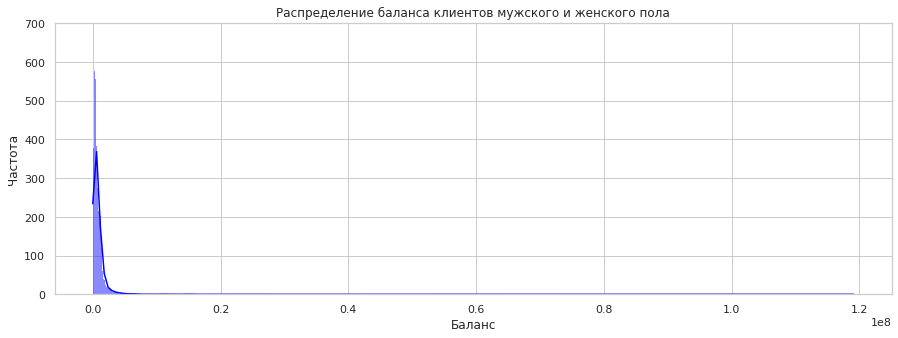

In [51]:
sns.histplot(group_bal, color='blue', kde=True)
plt.title('Распределение баланса клиентов мужского и женского пола')
plt.xlabel('Баланс')
plt.ylabel('Частота')
plt.show()

Исходя из графика можно сказать что Баланс подвержен выбросам, это может серьезно повлиять на проверку гипотезы. избавлюсь от них анализируя boxplot и применяя фильтр

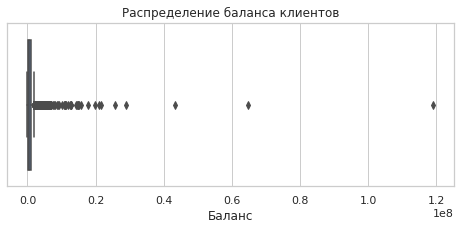

In [52]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=group_bal)
plt.title('Распределение баланса клиентов')
plt.xlabel('Баланс')
plt.show()

Методом подбора фильтр был определен как баланс менее 3 млн рублей

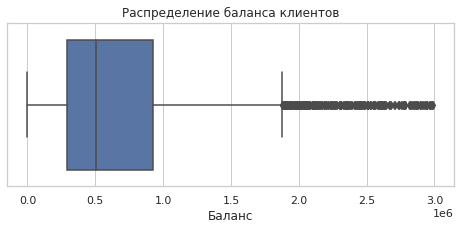

In [53]:
filtred_group_bal = df[df['balance'] < 3000000]['balance']
plt.figure(figsize=(8, 3))
sns.boxplot(x=filtred_group_bal)
plt.title('Распределение баланса клиентов')
plt.xlabel('Баланс')
plt.show()

Проверю на сколько сократились данные и выборки

In [54]:
filtred_group_female = df[(df['gender'] == "Ж") & (df['balance'] < 3000000)]['balance']
filtred_group_male   = df[(df['gender'] == "М") & (df['balance'] < 3000000)]['balance']

print(f'Общее сокращение выборки {group_bal.shape[0]/filtred_group_bal.shape[0]-1:.2%}')
print(f'Размер выборки клиентов женщин {filtred_group_female.shape[0]}, выборка сократилась на {group_female.shape[0]/filtred_group_female.shape[0]-1:.2%}')
print(f'Размер выборки клиентов мужчин {filtred_group_male.shape[0]}, выборка сократилась на {group_male.shape[0]/filtred_group_male.shape[0]-1:.2%}')

Общее сокращение выборки 2.67%
Размер выборки клиентов женщин 3915, выборка сократилась на 1.56%
Размер выборки клиентов мужчин 3580, выборка сократилась на 3.88%


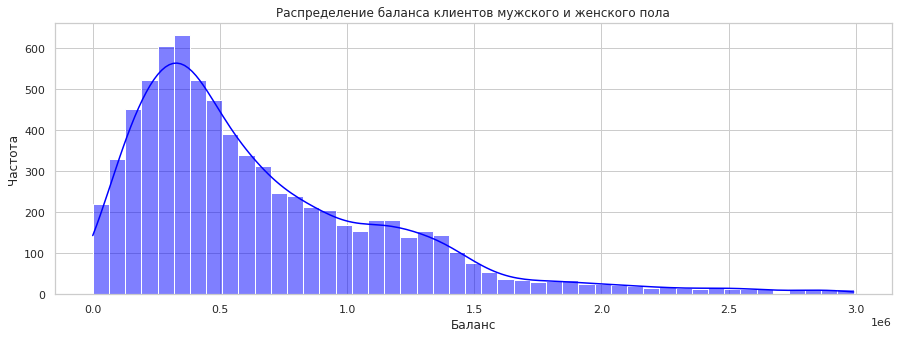

In [55]:
sns.histplot(filtred_group_bal, color='blue', kde=True)
plt.title('Распределение баланса клиентов мужского и женского пола')
plt.xlabel('Баланс')
plt.ylabel('Частота')
plt.show()

In [56]:
statistic, p_value = kstest(filtred_group_bal, 'norm')
alpha = 0.05

print(f'Для группы клиентов с одним или двумя продуктами')
print(f'Тест Колмогорова-Смирнова - p-value: {p_value}')
print(f'Уровень статистической значимости {alpha}')
print()

# Проверка отклонения от нормальности
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение клиентов не является нормальным.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: распределение клиентов является нормальным.')

Для группы клиентов с одним или двумя продуктами
Тест Колмогорова-Смирнова - p-value: 0.0
Уровень статистической значимости 0.05

Отвергаем нулевую гипотезу: распределение клиентов не является нормальным.


Как итог распределение не стримится к нормальному, для проверки гипотезы подойдет тест Манна-Уитни

###### Проверка гипотезы

In [57]:
statistic, p_value = mannwhitneyu(filtred_group_female, filtred_group_male, alternative='two-sided')

print(f'Статистика теста: {statistic}')
print(f'p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия в балансе по половому признаку статистически значимы.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: различия в балансе по половому признаку не статистически значимы.')

Статистика теста: 7011013.0
p-value: 0.9730377361880798
Нет оснований отвергнуть нулевую гипотезу: различия в балансе по половому признаку не статистически значимы.


**Вывод**

На основе предоставленных данных результаты теста указывают на то, что нет статистически значимых различий в балансе между клиентами женского и мужского пола. P-value равно **`0.973`**, что явно превышает обычные уровни значимости (обычно 0.05). Таким образом, мы не можем отвергнуть нулевую гипотезу (H0) и считаем, что различий в балансе между клиентами разных полов нет.

#### Промежуточный итог. Основания показателей для строения сегментов

##### Признаки которые влияют на клиентов которые пользуются продуктами банка

**Ключевые выводы из анализа:**

**`Корреляции:`**
- Отрицательная корреляция (-0.25) между наличием кредитной карты и оттоком, возможно, связана с более высокой лояльностью клиентов с картами из-за дополнительных льгот.
- Положительная корреляция между credit_score, оценкой собственности, балансом, количеством продуктов и последней активностью.

**`Анализ доли оттока:`**
- Пол: Существенное отличие в оттоке между мужчинами (23.80%) и женщинами (12.84%).
- Средний доход: Уровень дохода не существенно влияет на отток.
- Баланс: Высокий баланс связан с более высоким отклонением от общего оттока, однако влияние оказывают выбросы клиенты с высоким балансом, но их единицы.
- Возраст: Молодые (18-29) и старшие (51-60) клиенты имеют высокий отток.
- Кредитный рейтинг: Низкий и очень высокий рейтинг связаны с высоким отклонением от среднего оттока.
- Оценка собственности: Более высокие оценки связаны с более высоким оттоком.
- Количество продуктов: Клиенты с 3 и более продуктами имеют высокий отток.
- Наличие кредитной карты: Отсутствие кредитной карты связано с более высоким оттоком.
- Региональные различия: Нет существенных различий в оттоке между городами Ростов, Рыбинск и Ярославль.

##### Описание на основе каких показателей имеет смысл строить сегменты

**Для формирования сегментов целесообразно учитывать следующие показатели:**

- `Баланс на счету:` Этот показатель отражает финансовую стабильность клиента и его способность обеспечивать достаточный остаток средств на счете. Клиенты с высоким балансом могут иметь особые потребности и ожидания от банковских услуг.

- `Возраст клиента:` Возраст является важным фактором, влияющим на потребности и предпочтения клиента. Молодые клиенты, возможно, ориентированы на использование новых технологий и могут иметь специфические финансовые цели.

- `Кредитный рейтинг:` Кредитный рейтинг является показателем кредитоспособности клиента. Клиенты с высоким кредитным рейтингом могут иметь больший доступ к кредитам и дополнительным банковским услугам.

- `Оценка собственности клиента:` Оценка собственности может свидетельствовать о степени финансовой устойчивости клиента и его готовности к взятию на себя финансовых обязательств.

- `Количество продуктов, используемых клиентом:` Количество используемых продуктов указывает на уровень вовлеченности клиента в услуги банка. Клиенты, использующие несколько продуктов, могут иметь более глубокие отношения с банком.

- `Заработная плата клиентов:` Заработная плата может быть дополнительным показателем финансового благосостояния клиента и его потенциала для использования банковских услуг.

Эти показатели позволяют выделить группы клиентов с общими характеристиками, что важно для эффективного управления и удержания клиентов, а также для предоставления персонализированных банковских услуг.

#### Сегментация клиентов по количеству продуктов

##### Формулировка компактных сегментов, с более выраженными показателями из предыдущего блока

Сегменты которые будут сформированы:
- **`Клиенты инвесторы:`** это клиенты с высоким балансом(свыше 800 000), количеством собственности более 3 и доходом свыше 150 000
- **`Активные клиенты предпенсионного возраста:`** это клиенты возраст которых в диапазоне 51-60 и последняя активность = 1
- **`Лояльные банку клиенты:`** это клиенты имеющие более 2 продуктов и не имеющие кредитной карты

In [58]:
df['сегмент_1'] = 0
df['сегмент_2'] = 0
df['сегмент_3'] = 0

df.loc[(df['balance'] > 800000) & (df['equity']>=4) & (df['est_salary'] > 150000) , 'сегмент_1'] = 1
df.loc[(df['age_category']=='51-60') & (df['last_activity']==1) & (df['сегмент_1'] != 1), 'сегмент_2'] = 1
df.loc[(df['products'] >= 3) & (df['credit_card'] == 0) & (df['сегмент_1'] != 1) & (df['сегмент_2'] != 1), 'сегмент_3'] = 1

##### Расчет ключевых показателей по выделенным приоритетным сегментам

In [59]:
first_segment = df[df['сегмент_1'] == 1]

print(f'Сегмент Клиенты инвесторы')
print(f'Количество клиентов в сегменте {first_segment.shape[0]}')
print(f'Доля оттока: {round(first_segment["churn"].mean(),2)}')
print(f'Среднее количество продуктов: {round(first_segment["products"].mean(),2)}')
print(f'Средний возраст клиента {round(first_segment["age"].mean(),2)}, медианный возраст клиента {first_segment["age"].median()}')
print(f'Средний кредитный рейтинг {round(first_segment["score"].mean(),2)}, медианный кредитный рейтинг {first_segment["score"].median()}')
print(f'Доля клиентов с кредитной картой {round(first_segment["credit_card"].mean(),2)}')
print(f'Доля клиентов с недавней активностью {round(first_segment["last_activity"].mean(),2)}')
print(f'Доля клиентов по городам: Ростов {round(first_segment["rostov"].mean(),2)}, Рыбинск {round(first_segment["ribinsk"].mean(),2)}, Ярославль {round(first_segment["yaroslavl"].mean(),2)}')

Сегмент Клиенты инвесторы
Количество клиентов в сегменте 810
Доля оттока: 0.46
Среднее количество продуктов: 2.33
Средний возраст клиента 42.17, медианный возраст клиента 41.0
Средний кредитный рейтинг 896.24, медианный кредитный рейтинг 901.0
Доля клиентов с кредитной картой 0.5
Доля клиентов с недавней активностью 0.52
Доля клиентов по городам: Ростов 0.1, Рыбинск 0.22, Ярославль 0.68


In [60]:
second_segment = df[df['сегмент_2'] == 1]

print(f'Активные клиенты предпенсионного возраста')
print(f'Количество клиентов в сегменте {second_segment.shape[0]}')
print(f'Доля оттока: {round(second_segment["churn"].mean(),2)}')
print(f'Среднее количество продуктов: {round(second_segment["products"].mean(),2)}')
print(f'Средний баланс на счет {round(second_segment["balance"].mean(),2)}, медианный баланс на счету {second_segment["balance"].median()}')
print(f'Среднее количество собственности {round(second_segment["equity"].mean(),2)}, медианное количество собственности {second_segment["equity"].median()}')
print(f'Средняя заработная плата {round(second_segment["est_salary"].mean(),2)}, медианная заработная плата {second_segment["est_salary"].median()}')
print(f'Средний кредитный рейтинг {round(second_segment["score"].mean(),2)}, медианный кредитный рейтинг {second_segment["score"].median()}')
print(f'Доля клиентов с кредитной картой {round(second_segment["credit_card"].mean(),2)}')
print(f'Доля клиентов по городам: Ростов {round(second_segment["rostov"].mean(),2)}, Рыбинск {round(second_segment["ribinsk"].mean(),2)}, Ярославль {round(second_segment["yaroslavl"].mean(),2)}')

Активные клиенты предпенсионного возраста
Количество клиентов в сегменте 752
Доля оттока: 0.31
Среднее количество продуктов: 1.92
Средний баланс на счет 980304.26, медианный баланс на счету 603931.49
Среднее количество собственности 2.59, медианное количество собственности 3.0
Средняя заработная плата 125693.2, медианная заработная плата 97750.605
Средний кредитный рейтинг 842.74, медианный кредитный рейтинг 843.0
Доля клиентов с кредитной картой 0.59
Доля клиентов по городам: Ростов 0.17, Рыбинск 0.33, Ярославль 0.51


In [61]:
df.loc[(df['products'] >= 3) & (df['credit_card'] == 0) & (df['сегмент_1'] != 1) & (df['сегмент_2'] != 1), 'сегмент_3'] = 1

In [62]:
third_segment = df[df['сегмент_3'] == 1]

print(f'Лояльные банку клиенты')
print(f'Количество клиентов в сегменте {third_segment.shape[0]}')
print(f'Доля оттока: {round(third_segment["churn"].mean(),2)}')
print(f'Средний возраст клиента {round(third_segment["age"].mean(),2)}, медианный возраст клиента {third_segment["age"].median()}')
print(f'Средний баланс на счет {round(third_segment["balance"].mean(),2)}, медианный баланс на счету {third_segment["balance"].median()}')
print(f'Среднее количество собственности {round(third_segment["equity"].mean(),2)}, медианное количество собственности {third_segment["equity"].median()}')
print(f'Средняя заработная плата {round(third_segment["est_salary"].mean(),2)}, медианная заработная плата {third_segment["est_salary"].median()}')
print(f'Средний кредитный рейтинг {round(third_segment["score"].mean(),2)}, медианный кредитный рейтинг {third_segment["score"].median()}')
print(f'Доля клиентов с недавней активностью {round(third_segment["last_activity"].mean(),2)}')
print(f'Доля клиентов по городам: Ростов {round(third_segment["rostov"].mean(),2)}, Рыбинск {round(third_segment["ribinsk"].mean(),2)}, Ярославль {round(third_segment["yaroslavl"].mean(),2)}')

Лояльные банку клиенты
Количество клиентов в сегменте 611
Доля оттока: 0.25
Средний возраст клиента 44.23, медианный возраст клиента 40.0
Средний баланс на счет 751856.63, медианный баланс на счету 591335.73
Среднее количество собственности 3.5, медианное количество собственности 4.0
Средняя заработная плата 111027.6, медианная заработная плата 100873.85
Средний кредитный рейтинг 845.7, медианный кредитный рейтинг 844.0
Доля клиентов с недавней активностью 0.47
Доля клиентов по городам: Ростов 0.08, Рыбинск 0.14, Ярославль 0.78


##### Вывод по разделению на сегменты

**Сегмент Клиенты инвесторы**

- В данном сегменте зарегистрировано **810** клиентов, из которых **46%** показали признаки оттока. Среднее количество продуктов на клиента составляет **2.33**. Средний возраст клиента равен **42.17** лет, с медианным значением **41** лет.
- В сегменте преобладают клиенты с высоким кредитным рейтингом: средний рейтинг составляет **896.24**, а медиана — **901**. Половина клиентов обладает кредитной картой, что составляет **50%** от общего числа. **52%** клиентов проявили активность в последнее время.
- Распределение клиентов по городам следующее: **Ростов - 10%, Рыбинск - 22%, Ярославль - 68%**.

**Сегмент Активные клиенты предпенсионного возраста**

- В данном сегменте банка зарегистрировано **752** клиента. Доля оттока в сегменте составляет **31%**. Среднее количество продуктов на клиента — **1.92**. 
- Средний баланс на счету впечатляет и составляет **980,304.26**, с медианным значением **603,931.49**. Клиенты этого сегмента владеют в среднем **2.59** объектами недвижимости, с медианным значением в **3**.
- Средняя заработная плата клиентов в сегменте составляет **125,693.2**, с медианным значением **97,750.605**. Кредитный рейтинг клиентов в среднем равен **842.74**, а медиана составляет **843**.
- Доля клиентов с кредитной картой в сегменте — **59%**.
- Распределение клиентов по городам: **Ростов - 17%, Рыбинск - 33%, Ярославль - 51%**.

**Сегмент Лояльные банку клиенты**
- В этом сегменте банка насчитывается **611** клиентов, и отток составляет **25%**. Средний возраст клиента равен **44.23** лет, с медианным значением **40** лет.
- Средний баланс на счету у клиентов этого сегмента составляет **751,856.63**, а медианный баланс — **591,335.73**. Клиенты владеют в среднем **3.5** объектами недвижимости, с медианным значением **4**.
- Средняя заработная плата клиентов сегмента составляет **111,027.6**, медианная заработная плата — **100,873.85**. Кредитный рейтинг в среднем равен **845.7**, с медианой **844**.**47%** клиентов проявляют недавнюю активность. 
- Распределение клиентов по городам: **Ростов - 8%, Рыбинск - 14%, Ярославль - 78%**.

##### Рекомендации по оттоку клиентов

**Сегмент Клиенты инвесторы**

- **`Внедрить эксклюзивные инвестиционные предложения:`** Разработать специальные инвестиционные продукты и предложения, доступные исключительно клиентам сегмента инвесторов, с целью привлечения новых активов.

- **`Провести индивидуальные финансовые консультации:`** Запустить программу предоставления опытных персональных менеджеров для каждого клиента в сегменте, обеспечив тем самым более глубокое понимание их финансовых целей и потребностей.

**Сегмент Активные клиенты предпенсионного возраста**
- **`Внедрить эксклюзивные пенсионные предложения:`** Внедрить уникальные пенсионные планы и продукты, целенаправленно ориентированные на клиентов предпенсионного возраста.

- **`Предложить инвестиционные возможности:`** Запустить специальные инвестиционные предложения, направленные на обеспечение стабильного дохода и финансовой устойчивости в период предпенсии.

- **`Провести персональные консультации и чат-поддержку:`** Обеспечить доступ к заботливым финансовым консультантам и круглосуточному онлайн-чату, создавая у клиентов ощущение поддержки и оперативного реагирования на их запросы.

- **`Провести образовательные мероприятия по финансовой грамотности:`** Реализовать программы повышения финансовой грамотности, нацеленные на предоставление клиентам навыков принятия обоснованных финансовых решений и предотвращение мошенничества.

**Сегмент Лояльные банку клиенты**
- **`Внедрить индивидуальные бонусы и лояльность:`** Запустить систему персонализированных бонусов и программ лояльности, учитывая историю клиентских взаимодействий и поощряя долгосрочное сотрудничество.

- **`Внедрить повышенный кешбек:`** Предложить лояльным клиентам увеличенный кешбек, зависящий от их предыдущей активности и использования банковских услуг.

- **`Провести обзор и улучшение удобства мобильного приложения:`** Провести опрос среди клиентов, выявив основные аспекты удобства мобильного приложения, и внедрить необходимые улучшения для более комфортного использования.


#### Выводы исследования

##### Итоговый вывод по исследованию

**Для формирования сегментов целесообразно учитывать следующие показатели:**

- `Баланс на счету:` Этот показатель отражает финансовую стабильность клиента и его способность обеспечивать достаточный остаток средств на счете. Клиенты с высоким балансом могут иметь особые потребности и ожидания от банковских услуг.

- `Возраст клиента:` Возраст является важным фактором, влияющим на потребности и предпочтения клиента. Молодые клиенты, возможно, ориентированы на использование новых технологий и могут иметь специфические финансовые цели.

- `Кредитный рейтинг:` Кредитный рейтинг является показателем кредитоспособности клиента. Клиенты с высоким кредитным рейтингом могут иметь больший доступ к кредитам и дополнительным банковским услугам.

- `Оценка собственности клиента:` Оценка собственности может свидетельствовать о степени финансовой устойчивости клиента и его готовности к взятию на себя финансовых обязательств.

- `Количество продуктов, используемых клиентом:` Количество используемых продуктов указывает на уровень вовлеченности клиента в услуги банка. Клиенты, использующие несколько продуктов, могут иметь более глубокие отношения с банком.

- `Заработная плата клиентов:` Заработная плата может быть дополнительным показателем финансового благосостояния клиента и его потенциала для использования банковских услуг.

Эти показатели позволяют выделить группы клиентов с общими характеристиками, что важно для эффективного управления и удержания клиентов, а также для предоставления персонализированных банковских услуг.

**`Обобщенные выводы:`**
- Основные факторы, влияющие на отток: баланс, возраст, кредитный рейтинг, оценка собственности, количество продуктов, наличие кредитной карты.

**`Тест Манна-Уитни:`**

- Нет статистически значимых различий в возрасте между клиентами, использующими два и один продукты (p-значение = 0.07). Эти результаты подчеркивают необходимость дополнительного исследования для более глубокого понимания факторов, влияющих на поведение каждой из выделенных групп клиентов.

- При анализе баланса между клиентами женского и мужского пола также выявлено, что нет статистически значимых различий (p-value = 0.973). Это означает, что различий в балансе между клиентами разных полов нет. Таким образом, не можем отвергнуть нулевую гипотезу (H0).

**`Были сформированы сегменты клиентов:`** 

- `Клиенты инвесторы:` это клиенты с высоким балансом(свыше 800 000), количеством собственности более 3 и доходом свыше 150 000
- `Активные клиенты предпенсионного возраста:` это клиенты возраст которых в диапазоне 51-60 и последняя активность = 1
- `Лояльные банку клиенты:` это клиенты имеющие более 2 продуктов и не имеющие кредитной карты

**`Рекомендации по сегментам:`**
`Клиенты инвесторы:`
- Внедрить эксклюзивные инвестиционные предложения для привлечения новых активов.
- Предоставить персональных менеджеров для глубокого понимания финансовых целей клиентов.

`Активные клиенты предпенсионного возраста:`
- Внедрить уникальные пенсионные планы и инвестиционные предложения.
- Обеспечить доступ к заботливым финансовым консультантам и образовательным программам.

`Лояльные банку клиенты:`
- Запустить систему индивидуальных бонусов и программ лояльности.
- Предложить повышенный кешбек и улучшить удобство мобильного приложения на основе обратной связи клиентов.
